In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

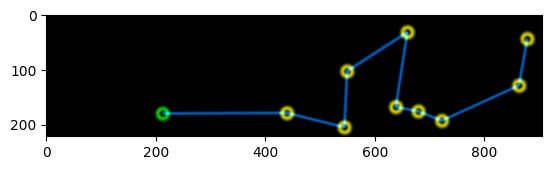

In [3]:
pic_num = 1

img = mpimg.imread(f'tsp-cv/{pic_num}.jpg')

plt.imshow(img)

(222, 906, 3)
(50, 50, 3)


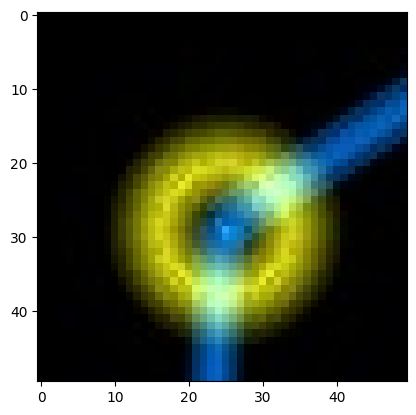

In [8]:
loc = [550, 100]

size = 25

img_segment = img[loc[1]-size:loc[1]+size, loc[0]-size:loc[0]+size]

plt.imshow(img_segment)

In [27]:
def neighbour(loc1, loc2):
    if abs(loc1[0]-loc2[0]) <= 2 and abs(loc1[1]-loc2[1]) <= 2:
        return True
    return False

def part_of_circle(loc, circle):
    for c in circle:
        if neighbour(loc, c):
            return True
    return False

def same_circle(circle1, circle2):
    for c1 in circle1:
        if part_of_circle(c1, circle2):
            return True
    return False

Center: [660.5, 33.0]
Center: [879.0, 45.0]
Center: [550.0, 104.0]
Center: [864.0, 130.0]
Center: [639.0, 169.0]
Center: [680.0, 177.0]
Center: [440.0, 180.0]
Center: [723.0, 194.0]
Center: [545.0, 206.0]


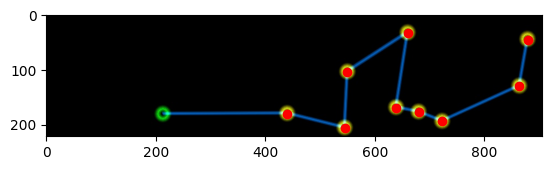

In [32]:
import numpy as np

def get_yellow_circles(image):

    # Define lower and upper bounds for yellow color in HSV
    lower_yellow = 150


    # Threshold the image to obtain a binary mask of yellow regions
    yellow_mask = np.where((image[:, :, 0] > lower_yellow), 255, 0)

    yellow_circles = []

    positions = np.argwhere(yellow_mask)

    for pos in positions:
        tmp = False
        for circle in yellow_circles:
            if part_of_circle(pos, circle):
                circle.append(pos)
                tmp = True
                break
        if not tmp:
            yellow_circles.append([pos])

    for circle1 in yellow_circles:
        for circle2 in yellow_circles:
            if np.array_equal(circle1[0], circle2[0]):
                continue
            if same_circle(circle1, circle2):
                circle1 += circle2
                yellow_circles.remove(circle2)

    yellow_circles_center = []
    for circle in yellow_circles:
        x_min = np.min(circle, axis=0)[1]
        x_max = np.max(circle, axis=0)[1]
        y_min = np.min(circle, axis=0)[0]
        y_max = np.max(circle, axis=0)[0]
        yellow_circles_center.append([(x_max-x_min)/2+x_min, (y_max-y_min)/2+y_min])

    return yellow_circles_center

    
        

# Example usage
img = mpimg.imread(f'tsp-cv/{pic_num}.jpg')
yellow_circles = get_yellow_circles(img)

# Print the properties of detected yellow circles
for pos in yellow_circles:
    print(f"Center: {pos}")

# Plot the detected yellow circles
plt.imshow(img)
for pos in yellow_circles:
    plt.plot(pos[0], pos[1], 'ro')